In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn import metrics
!pip install pafy
!pip install youtube_dl
!pip install pydub
from scipy.stats import kurtosis
from scipy.stats import skew
import csv
from google.colab import drive 
drive.mount('/content/gdrive')

dataset = pd.read_csv('gdrive/My Drive/Data.csv')
dataset.head(5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,roloff_kurtosis,roloff_skew,flux_max,flux_min,flux_mean,flux_std,flux_kurtosis,flux_skew,rmse_max,rmse_min,rmse_mean,rmse_std,rmse_kurtosis,rmse_skew,zcr_max,zcr_min,zcr_mean,zcr_std,zcr_kurtosis,zcr_skew,contrast_max,contrast_min,contrast_mean,contrast_std,contrast_kurtosis,contrast_skew,bandwidth_max,bandwidth_min,bandwidth_mean,bandwidth_std,...,mfcc_6_kurtosis,mfcc_6_skew,mfcc_7_max,mfcc_7_min,mfcc_7_mean,mfcc_7_std,mfcc_7_kurtosis,mfcc_7_skew,mfcc_8_max,mfcc_8_min,mfcc_8_mean,mfcc_8_std,mfcc_8_kurtosis,mfcc_8_skew,mfcc_9_max,mfcc_9_min,mfcc_9_mean,mfcc_9_std,mfcc_9_kurtosis,mfcc_9_skew,mfcc_10_max,mfcc_10_min,mfcc_10_mean,mfcc_10_std,mfcc_10_kurtosis,mfcc_10_skew,mfcc_11_max,mfcc_11_min,mfcc_11_mean,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo,genre
0,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,949.558806,1.507485,1.011686,10.981944,0.0,1.391008,1.481524,5.030479,2.113917,0.324014,0.022933,0.130225,0.053187,-0.032982,0.503164,0.242676,0.033203,0.083066,0.027690,3.904819,1.428553,48.289165,4.028252,20.530733,8.761009,1.002488,1.393933,3220.590296,1306.709966,2002.650192,293.081963,...,-0.044964,0.022212,43.634895,-10.577637,15.344631,8.305549,-0.042878,0.040176,13.907670,-38.793354,-12.285267,9.061618,-0.368435,-0.202331,39.424347,-14.338533,10.980492,7.963517,0.339515,0.126730,15.191152,-33.125565,-8.324325,7.862141,-0.179061,0.002401,31.242996,-12.483559,8.810669,7.157400,-0.189109,-0.110339,22.482096,-26.569305,-3.667368,6.422199,0.313302,-0.037197,123.046875,blues
1,5444.293577,421.091729,1529.835316,613.175361,4.028086,1.339397,8085.717773,333.764648,3548.820207,1725.249654,-0.647548,0.447830,17.791128,0.0,1.444008,1.996799,12.743418,3.142622,0.271687,0.004361,0.095918,0.048718,-0.058206,0.299131,0.323730,0.006348,0.056044,0.038059,9.193445,2.362931,48.775996,5.534489,20.676334,8.239387,1.531287,1.428818,3402.554398,1046.389224,2038.617579,462.379133,...,-0.036739,-0.257875,57.322296,-14.032225,23.358673,11.936523,-0.051591,0.107448,21.894630,-52.369705,-10.103617,12.894725,-0.527936,0.009104,40.404282,-29.546383,11.903745,10.219956,0.305566,-0.183417,24.502064,-37.257187,-5.560388,10.262492,0.172146,0.013335,37.242592,-25.349421,5.376803,9.812361,0.054884,0.154526,19.230034,-27.189579,-2.239120,8.055376,-0.182963,0.004210,107.666016,blues
2,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,884.938380,0.874197,0.613992,14.719387,0.0,1.638258,1.950675,8.131657,2.490637,0.326591,0.039753,0.175573,0.052423,-0.368472,0.220822,0.440918,0.012695,0.076301,0.031738,37.723069,4.185323,67.980056,4.558865,22.197265,8.727204,0.133514,0.939986,2662.739385,960.211956,1747.165985,275.765675,...,0.407629,0.056905,34.020233,-31.285770,11.629271,10.323797,1.380379,-0.974517,29.949429,-34.671497,-11.780589,8.098292,1.932035,0.884382,31.050621,-33.708015,9.706443,8.235600,2.533789,-0.926742,13.120670,-45.190308,-13.123111,7.596487,0.946092,-0.139495,25.241779,-32.569252,5.789265,8.033045,0.542265,-0.682770,23.078028,-28.854303,-8.905224,7.774160,0.489465,0.710559,161.499023,blues
3,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,1222.395194,1.608416,1.245734,14.619911,0.0,1.247379,1.750351,12.675188,3.203631,0.383715,0.009310,0.141191,0.079617,-0.381391,0.525917,0.145020,0.006348,0.033309,0.020569,2.017897,1.072661,53.952526,5.438508,21.428764,7.962859,-0.023194,0.871523,3174.579278,671.098012,1596.333948,408.119547,...,0.366743,-0.887007,30.783287,-18.335241,9.297966,9.008867,-0.251997,-0.328338,25.273712,-29.548191,-0.757742,9.601001,-0.467246,-0.325538,32.761795,-29.347542,8.149013,8.438341,1.682580,-0.656629,25.346262,-45.598274,-3.196314,10.502338,0.191070,-0.346805,40

In [0]:
X = dataset.drop(['genre'], axis=1)
Y = dataset['genre']

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

encoder = LabelEncoder()
Y_enc = encoder.fit_transform(Y)

PCA

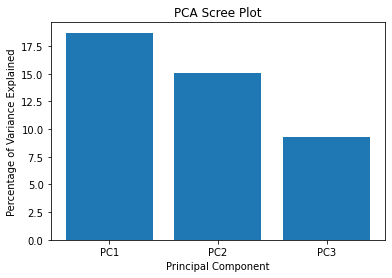

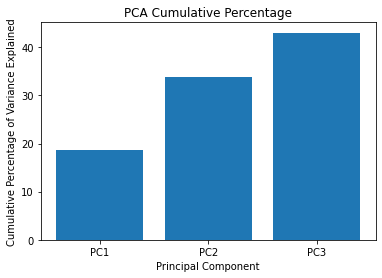

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3,whiten=False);
pca.fit(X_scaled)

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = np.array(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
plt.figure(1)
plt.bar(columns[:pca.n_components], np.array(percent_variance[:pca.n_components]))
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

percent_cumulative_variance = np.cumsum(percent_variance)
plt.figure(2)
plt.bar(columns[:pca.n_components], np.array(percent_cumulative_variance[:pca.n_components]))
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Cumulative Percentage')
plt.show()

xPca = pca.transform(X_scaled)

KMEANS

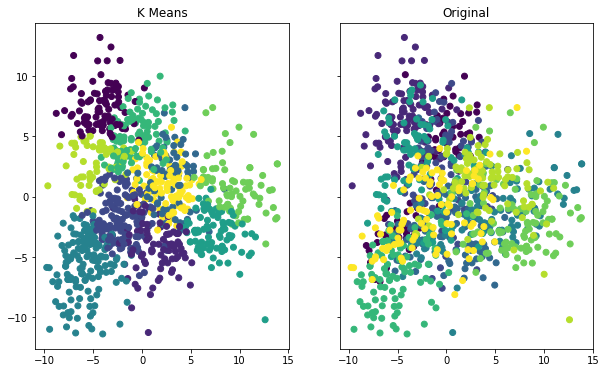

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(xPca)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(xPca[:,0], xPca[:,1], c=kmeans.labels_)
ax2.set_title("Original")
ax2.scatter(xPca[:,0], xPca[:,1], c=Y_enc)

In [0]:
def success(label,columns,sums):
    mostNum = np.amax(label)
    mostLb = label.index(mostNum)
    mostLabel = columns[mostLb]
    print("Most found label: " + mostLabel)
    print("Number of " + mostLabel + " found :" + str(mostNum))
    total = np.sum(label)
    print("Population of cluster: " + str(total))
    mostSum = sums[mostLb]
    mostAbility = round(100*mostNum/mostSum,1)
    print("Percentage of " + mostLabel + " found: " + str(mostAbility) + "%")  
    ability = round(100*mostNum/total, 1)
    print("Ability to distinguish " + mostLabel + " amoung other found genres in cluster: " + str(ability)+"%")

def compareLabels(clusterLabels,trueLabels,labelNum,columns,plot=1):
    score = 0
    sums = [0]*10
    for k in trueLabels:
        sums[k] +=1
    for i in range(labelNum):
        if i ==0:
            clusters = [clusterLabels.index[clusterLabels[0]==i].to_numpy()]
            label = [0]*10
            for x in clusters[i]:
                label[Y_enc[x]] += 1
            labels = [label]
        else:
            clusters.append(clusterLabels.index[clusterLabels[0]==i].to_numpy())
            label = [0]*10
            for x in clusters[i]:
                label[Y_enc[x]] += 1
            labels.append(label)
        if plot==1:
            plt.figure(figsize=(8, 4))
            plt.bar(columns,label)
            title = "Match for cluster label " + str(i)
            plt.title(title)
            plt.show()
            success(labels[i],columns,sums)
    return clusters,labels

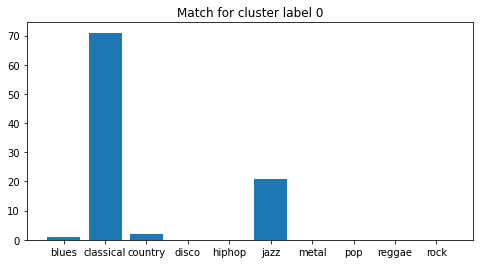

Most found label: classical
Number of classical found :71
Population of cluster: 95
Percentage of classical found: 71.0%
Ability to distinguish classical amoung other found genres in cluster: 74.7%


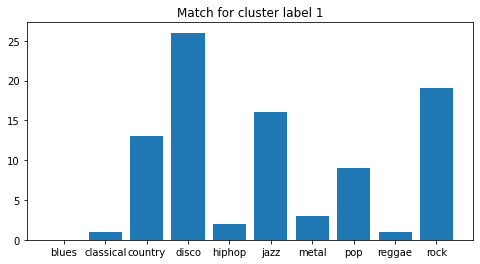

Most found label: disco
Number of disco found :26
Population of cluster: 90
Percentage of disco found: 26.0%
Ability to distinguish disco amoung other found genres in cluster: 28.9%


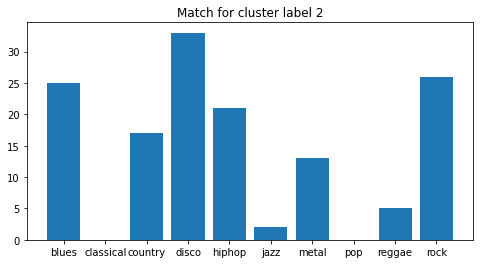

Most found label: disco
Number of disco found :33
Population of cluster: 142
Percentage of disco found: 33.0%
Ability to distinguish disco amoung other found genres in cluster: 23.2%


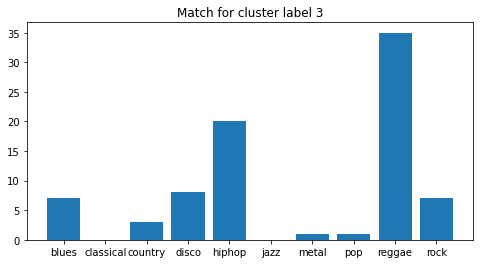

Most found label: reggae
Number of reggae found :35
Population of cluster: 82
Percentage of reggae found: 35.0%
Ability to distinguish reggae amoung other found genres in cluster: 42.7%


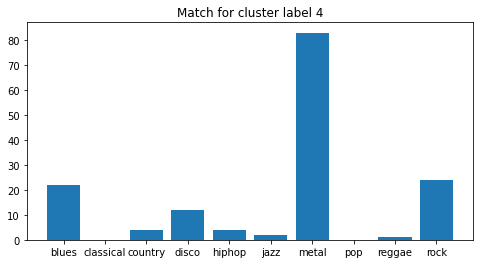

Most found label: metal
Number of metal found :83
Population of cluster: 152
Percentage of metal found: 83.0%
Ability to distinguish metal amoung other found genres in cluster: 54.6%


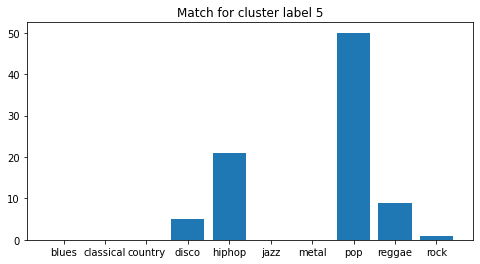

Most found label: pop
Number of pop found :50
Population of cluster: 86
Percentage of pop found: 50.0%
Ability to distinguish pop amoung other found genres in cluster: 58.1%


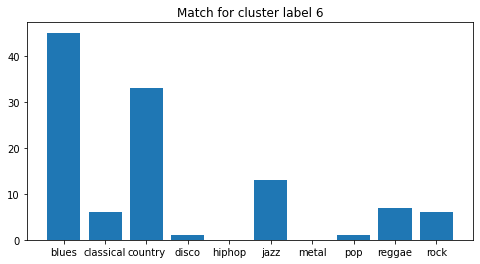

Most found label: blues
Number of blues found :45
Population of cluster: 112
Percentage of blues found: 45.0%
Ability to distinguish blues amoung other found genres in cluster: 40.2%


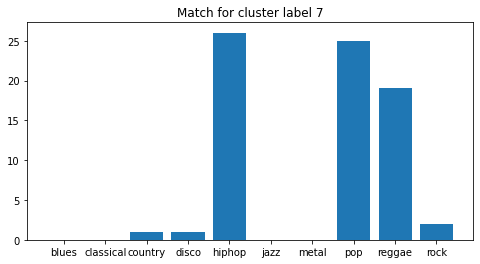

Most found label: hiphop
Number of hiphop found :26
Population of cluster: 74
Percentage of hiphop found: 26.0%
Ability to distinguish hiphop amoung other found genres in cluster: 35.1%


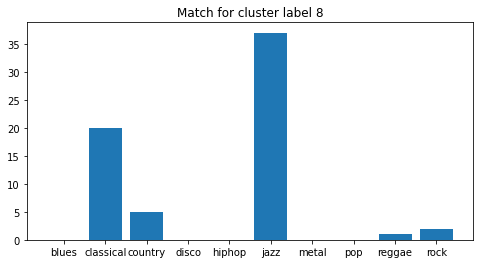

Most found label: jazz
Number of jazz found :37
Population of cluster: 65
Percentage of jazz found: 37.0%
Ability to distinguish jazz amoung other found genres in cluster: 56.9%


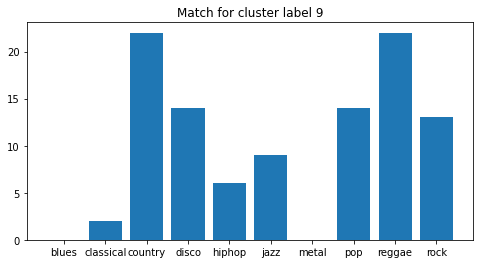

Most found label: country
Number of country found :22
Population of cluster: 102
Percentage of country found: 22.0%
Ability to distinguish country amoung other found genres in cluster: 21.6%


In [27]:
columns = Y.unique()
clusterLabels = pd.DataFrame(kmeans.labels_)
clusters,labels = compareLabels(clusterLabels,Y_enc,kmeans.n_clusters,columns)

In [28]:
metrics.adjusted_rand_score(Y_enc, kmeans.labels_)

0.2209574614562368

In [0]:
def get_features(y, sr):
    # Features to concatenate in the final dictionary
    features = {'centroid': None, 'roloff': None, 'flux': None, 'rmse': None,
                'zcr': None, 'contrast': None, 'bandwidth': None, 'flatness': None, 'chroma_stft': None}
    
    # Count silence
    if 0 < len(y):
        y_sound, _ = librosa.effects.trim(y)
    features['sample_silence'] = len(y) - len(y_sound)

    # Using librosa to calculate the features
    features['chroma_stft']=librosa.feature.chroma_stft(y=y, sr=sr).ravel()
    features['centroid'] = librosa.feature.spectral_centroid(y, sr=sr).ravel()
    features['roloff'] = librosa.feature.spectral_rolloff(y, sr=sr,).ravel()
    features['zcr'] = librosa.feature.zero_crossing_rate(y).ravel()
    features['rmse'] = librosa.feature.rms(y).ravel()
    features['flux'] = librosa.onset.onset_strength(y=y, sr=sr).ravel()
    features['contrast'] = librosa.feature.spectral_contrast(y, sr=sr).ravel()
    features['bandwidth'] = librosa.feature.spectral_bandwidth(y, sr=sr).ravel()
    features['flatness'] = librosa.feature.spectral_flatness(y).ravel()
    
    # MFCC treatment
    mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=13)
    for idx, v_mfcc in enumerate(mfcc):
        features['mfcc_{}'.format(idx)] = v_mfcc.ravel()
        
    # Get statistics from the vectors
    def get_moments(descriptors):
        result = {}
        for k, v in descriptors.items():
            result['{}_max'.format(k)] = np.max(v)
            result['{}_min'.format(k)] = np.min(v)
            result['{}_mean'.format(k)] = np.mean(v)
            result['{}_std'.format(k)] = np.std(v)
            result['{}_kurtosis'.format(k)] = kurtosis(v)
            result['{}_skew'.format(k)] = skew(v)
        return result
    
    dict_agg_features = get_moments(features)
    dict_agg_features['tempo'] = librosa.beat.tempo(y, sr=sr)[0]
    
    return dict_agg_features


Downloaded: 'Suavi - Drama Köprüsü.webm'
Converted into: 'song.mp3'
Successfully Extracted Features


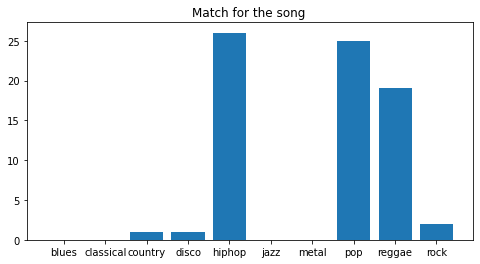

In [59]:
with warnings.catch_warnings():
  warnings.filterwarnings("ignore",category=DeprecationWarning)

  # Getting the video
  video_url = "https://www.youtube.com/watch?v=nmufPQAVBlo" # PASTE THE YOUTUBE URL HERE
  video = pafy.new(url=video_url, basic=False, gdata=False)
  length = video.length
  stream = video.getbestaudio()
  filename = stream.download()
  print("Downloaded: '" + video.title + '.' + stream.extension + "'")

  # Convert to MP3
  name = 'song.mp3'
  wav_audio = AudioSegment.from_file((video.title + '.' + stream.extension), format=stream.extension)
  audio = wav_audio.export(name, format="mp3")
  print("Converted into: '" + name + "'")

  # Extract Features
  y, sr = librosa.load(name, offset=1,duration = length-1)
  features = get_features(y, sr)
  features['genre'] = 'hiphop'
  features = pd.DataFrame(features, index=[0])
  print("Successfully Extracted Features")

  song_x = scale.transform(features.drop(['genre'], axis=1))

  songPca = pca.transform(song_x)

  k = np.squeeze(kmeans.predict(songPca))

  plt.figure(figsize=(8, 4))
  plt.bar(columns,labels[k])
  title = "Match for the song "
  plt.title(title)
  plt.show()